### Importing our libraries

In [8]:
import matplotlib
import matplotlib.pylab as plt
import matplotlib.finance as mpf
matplotlib.style.use('seaborn')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5
from plotly.graph_objs import *
from plotly.offline import init_notebook_mode, iplot, iplot_mpl
init_notebook_mode()
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from sklearn import preprocessing,cross_validation
from matplotlib import style
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


### Loading the data

In [4]:
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data
params = [{'q':'AAL'}]
period = "5Y"
# get open, high, low, close, volume data (return pandas dataframe)
df = get_prices_data(params, period)
df.head()

,AAL_Open,AAL_High,AAL_Low,AAL_Close,AAL_Volume
2013-12-09,23.85,25.44,23.4501,24.60,43197268
2013-12-10,24.50,25.17,24.4100,24.88,18660625
2013-12-11,25.48,27.20,25.3700,25.99,38843371
2013-12-12,26.20,26.71,25.4500,25.45,19981824
2013-12-13,25.75,26.30,25.5201,26.23,12192421


### Linear Regression

In [5]:
clf = LinearRegression(n_jobs=-1)
X = df.iloc[:,[0,1,2,4]].values
Y = df.iloc[:,3].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.random)
clf.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [6]:
Y_predictions = clf.predict(X_test)

In [9]:
import math
test_pred =clf.predict(X_test)
MSE = mean_squared_error(Y_test,test_pred)
#RMSE = math.sqrt(MSE)
print('MSE of Testing Data=',MSE)
## R-square score of this model
R2 = r2_score(Y_test,test_pred)
print('R2 of Testing Data=',R2)

MSE of Testing Data= 0.15345015985566948
R2 of Testing Data= 0.9966156376898929


In [10]:
# Predicting the test set results
train_pred =clf.predict(X_train)
## Mean squared error
MSE = mean_squared_error(Y_train,train_pred)
#RMSE = math.sqrt(MSE)
print('RMSE of Training Data =',MSE)
## R-square score of this model
R2 = r2_score(Y_train,train_pred)
print('R2 of Training Data =',R2)

RMSE of Training Data = 0.13392500787745842
R2 of Training Data = 0.9970024503084955


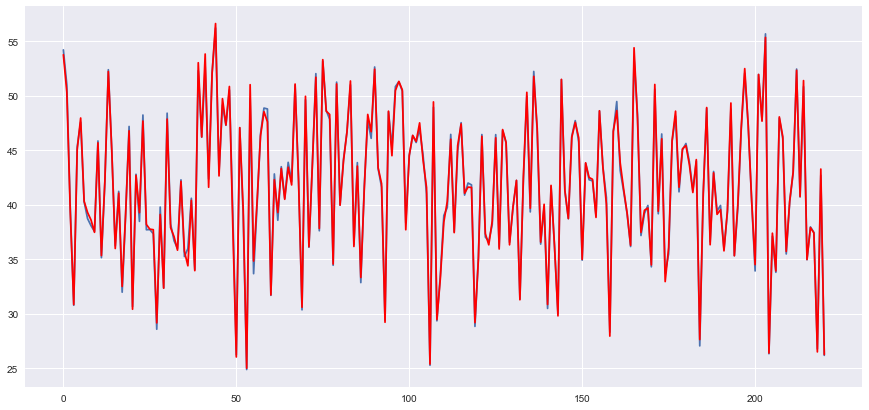

In [11]:
plt.figure(figsize=(15,7))
plt.plot(Y_test)
plt.plot(Y_predictions, color='red')
plt.show()

### So this is a plot for the linear regression model which shows how our predicted train data has been fitted against our test data and as you can see it is a good fit.

### Random Forest Regressor

In [12]:
regressor = RandomForestRegressor()
X = df.iloc[:,[0,1,2,4]].values
Y = df.iloc[:,3].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.random)
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [13]:
import math
test_pred =regressor.predict(X_test)
MSE = mean_squared_error(Y_test,test_pred)
#RMSE = math.sqrt(MSE)
print('MSE of Testing Data=',MSE)
## R-square score of this model
R2 = r2_score(Y_test,test_pred)
print('R2 of Testing Data=',R2)

MSE of Testing Data= 0.2540242068873302
R2 of Testing Data= 0.9935742561731805


In [14]:
# Predicting the test set results
train_pred =regressor.predict(X_train)
## Mean squared error
MSE = mean_squared_error(Y_train,train_pred)
#RMSE = math.sqrt(MSE)
print('RMSE of Training Data =',MSE)
## R-square score of this model
R2 = r2_score(Y_train,train_pred)
print('R2 of Training Data =',R2)

RMSE of Training Data = 0.040574692910317324
R2 of Training Data = 0.9991270835563402


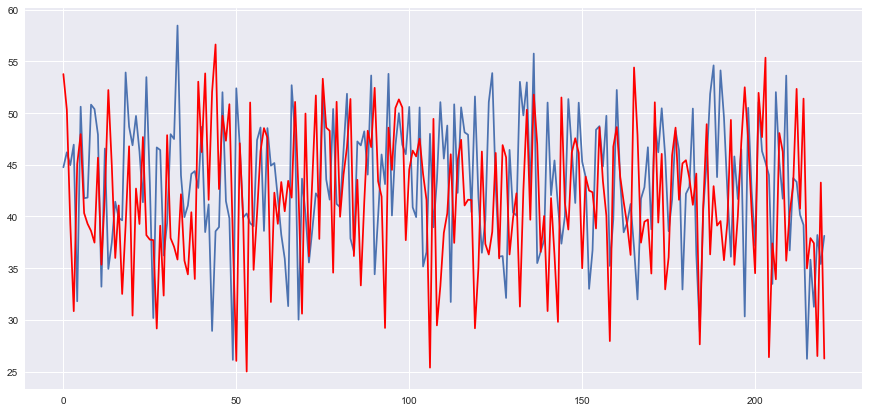

In [15]:
plt.figure(figsize=(15,7))
plt.plot(Y_test)
plt.plot(Y_predictions, color='red')
plt.show()

### So this is a plot for Random Forest model which shows how our predicted train data has been fitted against our test data and as you can see from the graph the prediction data which is represented by the red outline doesn't fit so well with the test data so we may conclude at a glance that Random forest is not such a good fit. 

### ARIMA

In [16]:
df = get_prices_data(params, period)
df.reset_index(level=0,inplace=True)
df=df.rename(index=str, columns={"index": "Date"})
df.columns

Index(['Date', 'AAL_Open', 'AAL_High', 'AAL_Low', 'AAL_Close', 'AAL_Volume'], dtype='object')

In [17]:
Series = df[['Date','AAL_Close']]

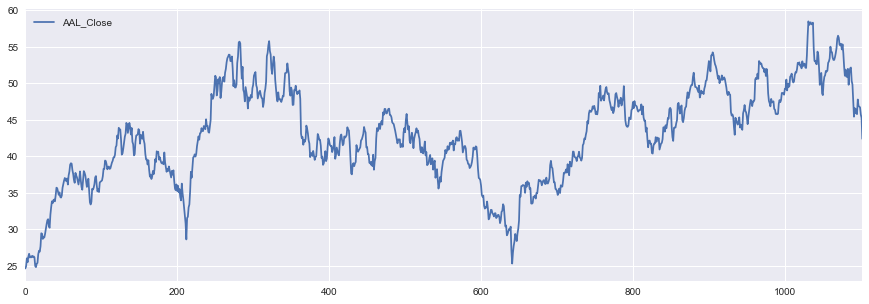

In [20]:
plt.figure(figsize=(15,7))
Series.plot()
plt.show()

### This graps just shows us the fluctuations of the closing value with time for a particular company stock price.

In [29]:
#Time Series Plot
import plotly.plotly as py
import plotly.graph_objs as go
import plotly as ply

ply.plotly.sign_in(username='Ranga_Chari', api_key='L9dHdlgu0wpPRNepbtUF')
data = [go.Scatter(x=df.Date, y=df.AAL_Close), ]
py.iplot(data)

In [21]:
df['Date'] = pd.to_datetime(df['Date'])
df1= df.set_index('Date')

In [22]:
df2=df1['AAL_Close']
#series2

In [23]:
pd.Series.autocorr(df2,lag=7)

0.9231353017079283

In [24]:
##### autocorrelation_plot(series)
plt.figure(figsize=(15,7))
plt.show()

In [25]:
# fit model
model = ARIMA(df2, order=(3,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.AAL_Close   No. Observations:                 1102
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -1494.922
Method:                       css-mle   S.D. of innovations              0.940
Date:                Fri, 27 Apr 2018   AIC                           2999.845
Time:                        05:55:50   BIC                           3024.869
Sample:                    12-10-2013   HQIC                          3009.311
                         - 04-26-2018                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0160      0.031      0.522      0.602      -0.044       0.076
ar.L1.D.AAL_Close     0.0630      0.030      2.083      0.037       0.004       0.122
ar.L2.D.AAL_Close     0.

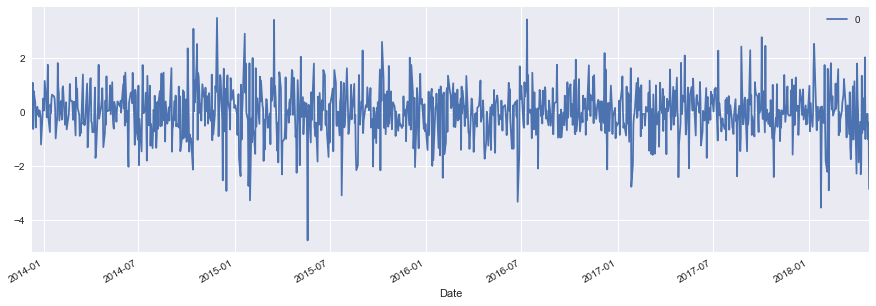

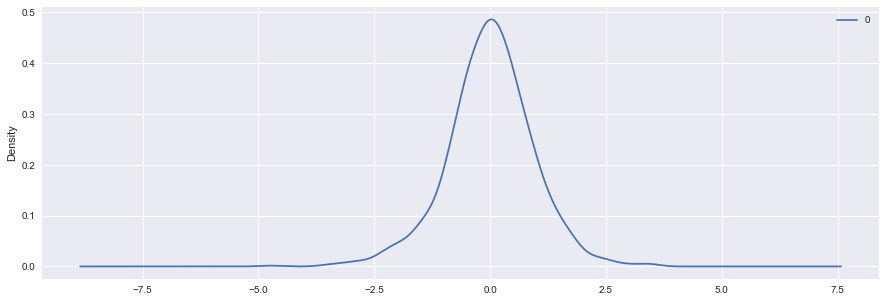

                 0
count  1102.000000
mean     -0.000035
std       0.939946
min      -4.742283
25%      -0.509135
50%       0.012663
75%       0.555012
max       3.469880


In [26]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

### These graphs give us an idea of the residual errors in our data.

In [27]:
#Rolling Forecast ARIMA Model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df2.values
size = int(len(X) * 0.80)
train = X[0:size]
test = X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

R2 = r2_score(test,predictions)
print('R2 of Testing Data=',R2)


predicted=50.211672, expected=49.480000
predicted=49.400751, expected=49.450000
predicted=49.470345, expected=49.390000
predicted=49.439078, expected=49.110000
predicted=49.133946, expected=48.790000
predicted=48.795802, expected=49.660000
predicted=49.741321, expected=48.030000
predicted=47.989824, expected=48.430000
predicted=48.417969, expected=48.970000
predicted=49.073876, expected=48.630000
predicted=48.648417, expected=48.780000
predicted=48.802668, expected=48.500000
predicted=48.512314, expected=49.250000
predicted=49.309542, expected=49.620000
predicted=49.696259, expected=50.320000
predicted=50.383145, expected=50.390000
predicted=50.426502, expected=51.260000
predicted=51.317204, expected=52.050000
predicted=52.141261, expected=53.030000
predicted=53.117907, expected=52.660000
predicted=52.668490, expected=51.610000
predicted=51.526358, expected=53.800000
predicted=53.930470, expected=53.810000
predicted=53.918952, expected=54.220000
predicted=54.235760, expected=53.870000


predicted=52.185937, expected=50.290000
predicted=50.182240, expected=49.820000
predicted=49.780131, expected=47.460000
predicted=47.342488, expected=45.400000
predicted=45.249496, expected=46.570000
predicted=46.674134, expected=45.870000
predicted=45.908224, expected=46.400000
predicted=46.461051, expected=45.750000
predicted=45.736650, expected=47.760000
predicted=47.884271, expected=46.880000
predicted=46.898687, expected=46.780000
predicted=46.748030, expected=46.680000
predicted=46.694816, expected=45.690000
predicted=45.640081, expected=45.250000
predicted=45.228756, expected=42.370000
Test MSE: 0.943
R2 of Testing Data= 0.9158410231120215


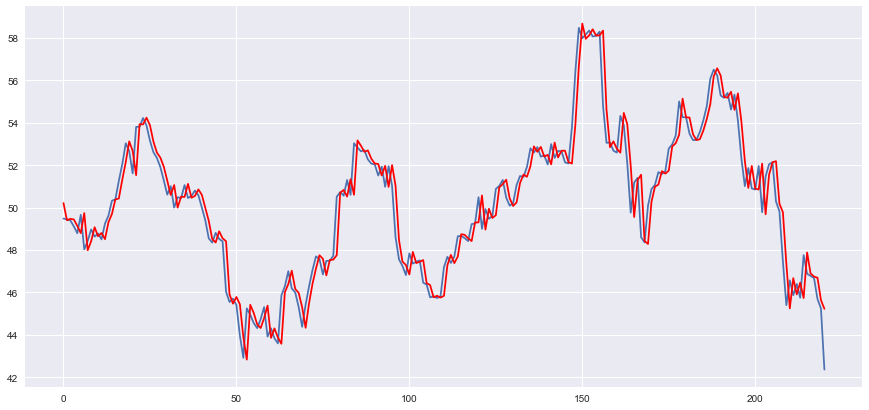

In [28]:
plt.figure(figsize=(15,7))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

### So this is a plot for the ARIMA model which shows how our predicted train data has been fitted against our test data and as you can see this is almost as good a fit as the linear regression model.